In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')






In [2]:
data_clean_train = pd.read_csv("housing_train_clean.csv")
data_clean_test = pd.read_csv('housing_test_clean.csv')

In [3]:
data_clean_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,True,False,False,False,False,False,...,False,True,8,856,True,False,0,2003,2003,2008
1,1262,0,0,3,True,False,False,False,False,False,...,False,True,6,1262,True,False,298,1976,1976,2007
2,920,866,0,3,True,False,False,False,False,False,...,False,True,6,920,True,False,0,2001,2002,2008
3,961,756,0,3,True,False,False,False,False,False,...,False,True,7,756,True,False,0,1915,1970,2006
4,1145,1053,0,4,True,False,False,False,False,False,...,False,True,9,1145,True,False,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,True,False,False,False,False,False,...,False,True,7,953,True,False,0,1999,2000,2007
1456,2073,0,0,3,True,False,False,False,False,False,...,False,True,7,1542,True,False,349,1978,1988,2010
1457,1188,1152,0,4,True,False,False,False,False,False,...,False,True,9,1152,True,False,0,1941,2006,2010
1458,1078,0,0,2,True,False,False,False,False,False,...,False,True,5,1078,True,False,366,1950,1996,2010


In [4]:
Y_train = data_clean_train["SalePrice"]
Y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
X_train = data_clean_train

In [6]:
X_train.drop(["SalePrice"], axis=1, inplace=True)

In [7]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,True,False,False,False,False,False,...,False,True,8,856,True,False,0,2003,2003,2008
1,1262,0,0,3,True,False,False,False,False,False,...,False,True,6,1262,True,False,298,1976,1976,2007
2,920,866,0,3,True,False,False,False,False,False,...,False,True,6,920,True,False,0,2001,2002,2008
3,961,756,0,3,True,False,False,False,False,False,...,False,True,7,756,True,False,0,1915,1970,2006
4,1145,1053,0,4,True,False,False,False,False,False,...,False,True,9,1145,True,False,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,True,False,False,False,False,False,...,False,True,7,953,True,False,0,1999,2000,2007
1456,2073,0,0,3,True,False,False,False,False,False,...,False,True,7,1542,True,False,349,1978,1988,2010
1457,1188,1152,0,4,True,False,False,False,False,False,...,False,True,9,1152,True,False,0,1941,2006,2010
1458,1078,0,0,2,True,False,False,False,False,False,...,False,True,5,1078,True,False,366,1950,1996,2010


In [8]:
data_clean_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1,0,0,0,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1,1329,0,0,3,1,0,0,0,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
2,928,701,0,3,1,0,0,0,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
3,926,678,0,3,1,0,0,0,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,0,1,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0,0,0,1,0,0,...,0,1,5,546.0,1,0,0,1970,1970,2006
1455,546,546,0,3,0,0,0,0,1,0,...,0,1,6,546.0,1,0,0,1970,1970,2006
1456,1224,0,0,4,1,0,0,0,0,0,...,0,1,7,1224.0,1,0,474,1960,1996,2006
1457,970,0,0,3,1,0,0,0,0,0,...,0,1,6,912.0,1,0,80,1992,1992,2006


In [9]:
Y_test = data_clean_test["SalePrice"]
Y_test

0       120376.994315
1       152387.635505
2       185025.193763
3       198385.651258
4       185934.885245
            ...      
1454     85890.984520
1455     83811.680275
1456    160189.586559
1457    115398.604894
1458    224009.963740
Name: SalePrice, Length: 1459, dtype: float64

In [10]:
X_test = data_clean_test

In [11]:
X_test.drop(["SalePrice"], axis=1, inplace=True)

In [12]:
X_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1,0,0,0,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1,1329,0,0,3,1,0,0,0,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
2,928,701,0,3,1,0,0,0,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
3,926,678,0,3,1,0,0,0,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,0,1,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0,0,0,1,0,0,...,0,1,5,546.0,1,0,0,1970,1970,2006
1455,546,546,0,3,0,0,0,0,1,0,...,0,1,6,546.0,1,0,0,1970,1970,2006
1456,1224,0,0,4,1,0,0,0,0,0,...,0,1,7,1224.0,1,0,474,1960,1996,2006
1457,970,0,0,3,1,0,0,0,0,0,...,0,1,6,912.0,1,0,80,1992,1992,2006


In [13]:
X_train=X_train.values
X_train.shape

(1460, 271)

In [14]:
Y_train=Y_train.values.reshape(-1)
Y_train.shape

(1460,)

In [15]:
X_test=X_test.values
X_test.shape

(1459, 271)

In [16]:
Y_test=Y_test.values.reshape(-1)
Y_test.shape

(1459,)

In [17]:
# normalize the features

scaler=MinMaxScaler()
#get the parameters of the transform
scaler.fit(X_train)
#normalize the features in the training set
X_train_s = scaler.transform(X_train)
#normalize the features in the test set
X_test_s = scaler.transform(X_test)

### KNeighborsRegressor

In [18]:
KNR = KNeighborsRegressor()

In [19]:
# train the regressor
KNR.fit(X_train_s, Y_train)

KNeighborsRegressor()

In [20]:
# test the regressor
Y_test_pred = KNR.predict(X_test_s)
# Calculate errors
MSE_KNR = np.mean((Y_test - Y_test_pred)**2)
MAE_KNR = np.mean(np.abs(Y_test - Y_test_pred))
MAPE_KNR =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_KNR)
print('MAE=', MAE_KNR)
print('MAPE=', MAPE_KNR)

MSE= 1482823205.7791765
MAE= 23333.70597345177
MAPE= 0.1310792915889955


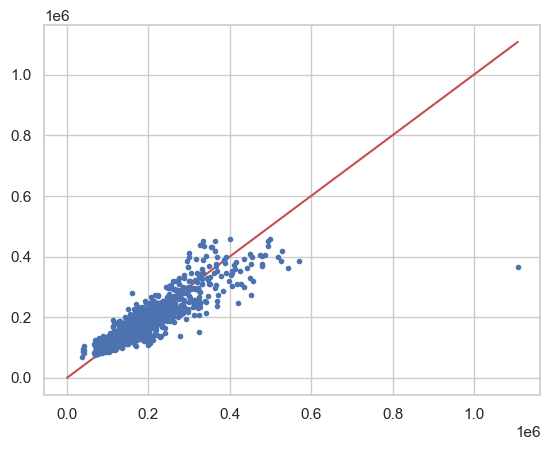

In [21]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

### LinearRegression

In [22]:
LR = LinearRegression()

In [23]:
# train the regressor
LR.fit(X_train_s, Y_train)

LinearRegression()

In [24]:
# test the regressor
Y_test_pred = LR.predict(X_test_s)
# Calculate errors
MSE_LR = np.mean((Y_test - Y_test_pred)**2)
MAE_LR = np.mean(np.abs(Y_test - Y_test_pred))
MAPE_LR =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_LR)
print('MAE=', MAE_LR)
print('MAPE=', MAPE_LR)

MSE= 445485805.39052826
MAE= 11823.932269174758
MAPE= 0.07203572786733323


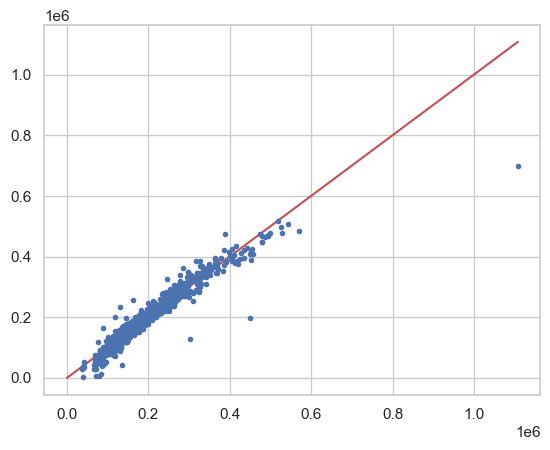

In [25]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

### DecisionTreeRegressor

In [26]:
DTR = DecisionTreeRegressor()

In [27]:
# train the regressor
DTR.fit(X_train_s, Y_train)

DecisionTreeRegressor()

In [28]:
# test the regressor
Y_test_pred = DTR.predict(X_test_s)
# Calculate errors
MSE_DTR = np.mean((Y_test - Y_test_pred)**2)
MAE_DTR = np.mean(np.abs(Y_test - Y_test_pred))
MAPE_DTR =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_DTR)
print('MAE=', MAE_DTR)
print('MAPE=', MAPE_DTR)

MSE= 1279013929.1389835
MAE= 21342.370594316606
MAPE= 0.11812912952207848


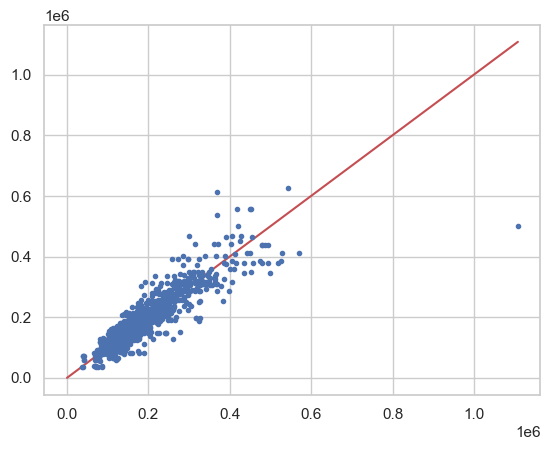

In [29]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

### RandomForestRegressor

In [30]:
RFR = RandomForestRegressor()

In [31]:
# train the regressor
RFR.fit(X_train_s, Y_train)

RandomForestRegressor()

In [32]:
# test the regressor
Y_test_pred = RFR.predict(X_test_s)
# Calculate errors
MSE_RFR = np.mean((Y_test - Y_test_pred)**2)
MAE_RFR = np.mean(np.abs(Y_test - Y_test_pred))
MAPE_RFR =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_RFR)
print('MAE=', MAE_RFR)
print('MAPE=', MAPE_RFR)

MSE= 551744220.1048815
MAE= 10534.76562786597
MAPE= 0.06050549000692673


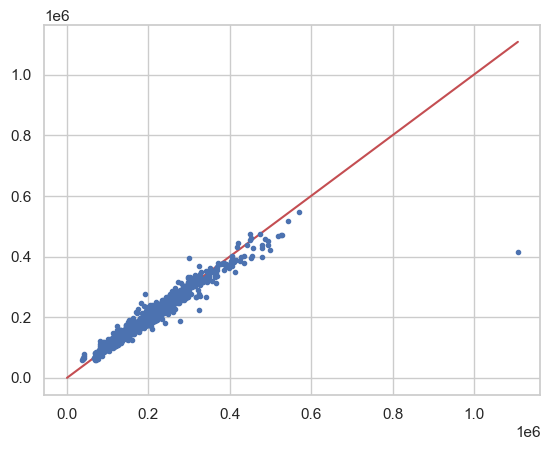

In [33]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

### Pandas Dataframe Report for MSE, MAE and MAPE

In [34]:
report = {
    '': ['MSE', 'MAE', 'MAPE'],
    'KNeighborsRegressor': [MSE_KNR, MAE_KNR, MAPE_KNR],
    'LogisticRegression': [MSE_LR, MAE_LR, MAPE_LR],
    'DecisionTreeRegressor': [MSE_DTR, MAE_DTR, MAPE_DTR],
    'RandomForestRegressor': [MSE_RFR, MAE_RFR, MAPE_RFR]
}

accuracy_df = pd.DataFrame(report)
accuracy_df

,,KNeighborsRegressor,LogisticRegression,DecisionTreeRegressor,RandomForestRegressor
0,MSE,1.482823e+09,4.454858e+08,1.279014e+09,5.517442e+08
1,MAE,2.333371e+04,1.182393e+04,2.134237e+04,1.053477e+04
2,MAPE,1.310793e-01,7.203573e-02,1.181291e-01,6.050549e-02
